<a href="https://colab.research.google.com/github/ShreePurvaja/Data-Science-Notes/blob/main/Hypothesis_Testing(conti_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13.03.2025

In [ ]:
#2 sample test - check for independence (cannot include more than 2 variables)
#dependence - difference
#independent - no difference

In [1]:
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats as stats


#enter IQ levels for 20 individuals from each city
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,


        105, 109, 109, 109, 110, 112, 112, 113, 114, 114]


cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
        109, 114, 115, 116, 117, 117, 128, 129, 130, 133]


 #perform two sample z-test
# print(ztest(cityA, cityB, value=0))


print(stats.ttest_ind(a=cityA, b=cityB, equal_var=True))
#here value of H0 is 0 because null hypothesis is that there is no difference in IQ of two cities


TtestResult(statistic=np.float64(-1.9953236073282115), pvalue=np.float64(0.05321388037191098), df=np.float64(38.0))


In [2]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/cs1%20(1).csv')
df.shape
df


,id,age,gender,region,income,married,children,car,save_act,current_act,mortgage,pl
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
325,ID12426,24,FEMALE,TOWN,9465.21,NO,0,NO,NO,YES,NO,YES
326,ID12427,39,MALE,INNER_CITY,34852.30,YES,1,NO,YES,NO,YES,YES
327,ID12428,24,MALE,INNER_CITY,21268.40,YES,0,NO,NO,YES,YES,YES
328,ID12429,57,FEMALE,RURAL,50849.20,NO,1,NO,YES,NO,YES,YES


In [3]:
# to check dependence between age and income
#here value we declared that there is no difference between age and income
#but the hypothesis is failed saying that there is difference - dependence

print(stats.ttest_ind(a=df['age'],b=df['income'],equal_var=True))


TtestResult(statistic=np.float64(-37.83413254443952), pvalue=np.float64(3.035491870002726e-167), df=np.float64(658.0))


In [5]:
#to take gender and income

#but gender is categorical variable and income is numerical variable

#with this we can speak the insight of gender equality
m = df[df['gender']=='MALE']['income']
display(m)
n = df[df['gender']== 'FEMALE']['income']
display(n)

,income
1,30085.10
6,8877.07
7,24946.60
9,24212.10
14,19474.60
...,...
321,22882.90
323,24027.60
324,28495.10
326,34852.30


,income
0,17546.00
2,16575.40
3,20375.40
4,50576.30
5,37869.60
...,...
318,23171.80
322,11043.70
325,9465.21
328,50849.20


In [12]:
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats as stats
print(stats.ttest_ind(a=m,b=n))
# income of male and female - no difference - data independent
# H0 - So there is gender equality

TtestResult(statistic=np.float64(-0.2449534813001663), pvalue=np.float64(0.8066456277315542), df=np.float64(328.0))


In [13]:
c = df[df['car'] == 'YES']['income']
display(m)
d=df[df['car'] == 'NO']['income']
display(n)

,income
1,30085.10
6,8877.07
7,24946.60
9,24212.10
14,19474.60
...,...
321,22882.90
323,24027.60
324,28495.10
326,34852.30


,income
0,17546.00
2,16575.40
3,20375.40
4,50576.30
5,37869.60
...,...
318,23171.80
322,11043.70
325,9465.21
328,50849.20


In [14]:
#H0 - There is no dependency between car and income
c=df[df['car'] == 'YES']['income']
d=df[df['car'] == 'NO']['income']
print(stats.ttest_ind(a=c,b=d))
#in this case it is fail to reject - data in independent

TtestResult(statistic=np.float64(1.8137276837559462), pvalue=np.float64(0.07063337879141056), df=np.float64(328.0))


In [15]:
df['region'].unique()

array(['INNER_CITY', 'TOWN', 'RURAL', 'SUBURBAN'], dtype=object)

In [18]:
g1 = df[df['region']=='INNER_CITY']['income']
g2 = df[df['region']=='SUBURBAN']['income']
g3 = df[df['region']=='TOWN']['income']
g4 = df[df['region']=='RURAL']['income']

print(stats.f_oneway(g1,g2,g3,g4))

#H0 - fail to reject

#there is no difference between region and income - data independent

F_onewayResult(statistic=np.float64(1.2950173064832669), pvalue=np.float64(0.27607567314467585))


<Axes: xlabel='region', ylabel='income'>

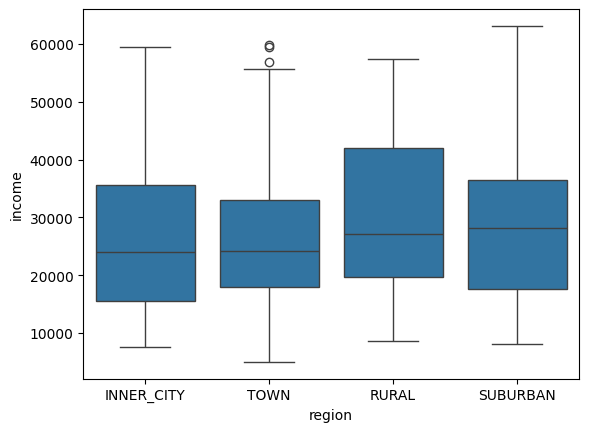

In [22]:
import seaborn as sns
sns.boxplot(x=df['region'],y=df['income'],data = df)

In [23]:
#H0 - there is no difference between children and income

gr1=df[df['children']==0]['income']
gr2=df[df['children']==1]['income']
gr3=df[df['children']==2]['income']
gr4=df[df['children']==3]['income']
print(stats.f_oneway(gr1,gr2,gr3,gr4))
#fail to reject

F_onewayResult(statistic=np.float64(0.5667851690722862), pvalue=np.float64(0.6372599526845))
